# AdaBoost step by step

Reference: https://www.kdnuggets.com/2020/12/implementing-adaboost-algorithm-from-scratch.html

Code: https://github.com/jamesajeeth/Data-Science/blob/master/Adaboost%20from%20scratch/Boosting%20Algorithm%20from%20scratch%20updated.ipynb

In [196]:
import pandas as pd

In [197]:
#importing file
iris = pd.read_csv("iris.csv")

In [198]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [210]:
#considering only two classes
example = iris[(iris['species'] == 'versicolor') | (iris['species'] == 'virginica')]

In [211]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [212]:
#replacing the two classes with +1 and -1
# example['Label'] = example['species'].replace(to_replace = ['versicolor','virginica'], value=[1,-1])
class_label = example['species'].replace(to_replace = ['versicolor','virginica'], value=[1,-1])

example = pd.concat([example, class_label.rename('Label')], axis=1)

In [213]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Label
50,7.0,3.2,4.7,1.4,versicolor,1
51,6.4,3.2,4.5,1.5,versicolor,1
52,6.9,3.1,4.9,1.5,versicolor,1
53,5.5,2.3,4.0,1.3,versicolor,1
54,6.5,2.8,4.6,1.5,versicolor,1


In [214]:
example.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,Label
145,6.7,3.0,5.2,2.3,virginica,-1
146,6.3,2.5,5.0,1.9,virginica,-1
147,6.5,3.0,5.2,2.0,virginica,-1
148,6.2,3.4,5.4,2.3,virginica,-1
149,5.9,3.0,5.1,1.8,virginica,-1


In [215]:
example = example.drop('species', axis = 1) # Dropping the species with label

In [216]:
example

,sepal_length,sepal_width,petal_length,petal_width,Label
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1
146,6.3,2.5,5.0,1.9,-1
147,6.5,3.0,5.2,2.0,-1
148,6.2,3.4,5.4,2.3,-1


In [220]:
# Initially assign same weights to each records in the dataset
# Set probability to (1 / no. of rows)

example['probR1'] = 1/(example.shape[0])

In [221]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1
50,7.0,3.2,4.7,1.4,1,0.01
51,6.4,3.2,4.5,1.5,1,0.01
52,6.9,3.1,4.9,1.5,1,0.01
53,5.5,2.3,4.0,1.3,1,0.01
54,6.5,2.8,4.6,1.5,1,0.01


In [222]:
example.tail()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1
145,6.7,3.0,5.2,2.3,-1,0.01
146,6.3,2.5,5.0,1.9,-1,0.01
147,6.5,3.0,5.2,2.0,-1,0.01
148,6.2,3.4,5.4,2.3,-1,0.01
149,5.9,3.0,5.1,1.8,-1,0.01


In [223]:
import random

#simple random sample with replacement
random.seed(10)
example1 = example.sample(len(example), replace = True, weights = example['probR1'])

In [224]:
example1.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1
139,6.9,3.1,5.4,2.1,-1,0.01
85,6.0,3.4,4.5,1.6,1,0.01
54,6.5,2.8,4.6,1.5,1,0.01
121,5.6,2.8,4.9,2.0,-1,0.01
68,6.2,2.2,4.5,1.5,1,0.01


In [225]:
example.tail()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1
145,6.7,3.0,5.2,2.3,-1,0.01
146,6.3,2.5,5.0,1.9,-1,0.01
147,6.5,3.0,5.2,2.0,-1,0.01
148,6.2,3.4,5.4,2.3,-1,0.01
149,5.9,3.0,5.1,1.8,-1,0.01


In [231]:
#X_train and Y_train split
X_train = example1.iloc[0:len(iris),0:4] # input set
y_train = example1.iloc[0:len(iris),4]   # label set

In [232]:
from sklearn.tree import DecisionTreeClassifier

#fitting the DT model with depth one
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1) # training only one stamp at a time
clf = clf_gini.fit(X_train, y_train)

[Text(0.5, 0.75, 'x[2] <= 4.75\ngini = 0.498\nsamples = 100\nvalue = [53, 47]'),
 Text(0.25, 0.25, 'gini = 0.093\nsamples = 41\nvalue = [2, 39]'),
 Text(0.75, 0.25, 'gini = 0.234\nsamples = 59\nvalue = [51, 8]')]

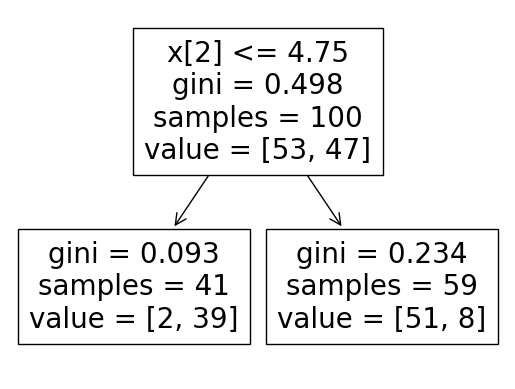

In [233]:
from sklearn import tree

#plotting tree for round 1 boosting
tree.plot_tree(clf)

In [234]:
#prediction
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
y_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [235]:
#adding a column pred1 after the first round of boosting
example['pred1'] = y_pred

In [236]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1
50,7.0,3.2,4.7,1.4,1,0.01,1
51,6.4,3.2,4.5,1.5,1,0.01,1
52,6.9,3.1,4.9,1.5,1,0.01,-1
53,5.5,2.3,4.0,1.3,1,0.01,1
54,6.5,2.8,4.6,1.5,1,0.01,1


In [237]:
example.tail()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1
145,6.7,3.0,5.2,2.3,-1,0.01,-1
146,6.3,2.5,5.0,1.9,-1,0.01,-1
147,6.5,3.0,5.2,2.0,-1,0.01,-1
148,6.2,3.4,5.4,2.3,-1,0.01,-1
149,5.9,3.0,5.1,1.8,-1,0.01,-1


In [238]:
#misclassified = 0 if the label and prediction are same
example.loc[example.Label != example.pred1, 'misclassified'] = 1
example.loc[example.Label == example.pred1, 'misclassified'] = 0

In [239]:
example

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0
146,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0
147,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0
148,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0


In [240]:
example.loc[example.misclassified == 1]

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0
70,5.9,3.2,4.8,1.8,1,0.01,-1,1.0
72,6.3,2.5,4.9,1.5,1,0.01,-1,1.0
76,6.8,2.8,4.8,1.4,1,0.01,-1,1.0
77,6.7,3.0,5.0,1.7,1,0.01,-1,1.0
83,6.0,2.7,5.1,1.6,1,0.01,-1,1.0
106,4.9,2.5,4.5,1.7,-1,0.01,1,1.0


In [241]:
example.loc[example.misclassified == 0].head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0


In [242]:
# count of misclassified data
print('Total misclassified - TRUE', example.loc[example.misclassified == 1].shape[0])
print('Total misclassified - FALSE', example.loc[example.misclassified == 0].shape[0])

Total misclassified - TRUE 7
Total misclassified - FALSE 93


In [243]:
#error calculation for first round
e1 = sum(example['misclassified'] * example['probR1'])

In [244]:
e1

0.07

In [245]:
# Now, it's time to calculate the weight
from math import log

#calculation of alpha (performance)
alpha1 = 0.5*log((1-e1)/e1)

alpha1

1.2933446720489712

In [246]:
import numpy as np

#update weight
new_weight = example['probR1']*np.exp(-1*alpha1*example['Label']*example['pred1'])

In [247]:
new_weight.head()

50    0.002744
51    0.002744
52    0.036450
53    0.002744
54    0.002744
dtype: float64

In [248]:
new_weight.tail()

145    0.002744
146    0.002744
147    0.002744
148    0.002744
149    0.002744
dtype: float64

In [249]:
#normalized weight
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [250]:
normalized_weight.head()

50    0.005376
51    0.005376
52    0.071429
53    0.005376
54    0.005376
dtype: float64

In [251]:
normalized_weight.tail()

145    0.005376
146    0.005376
147    0.005376
148    0.005376
149    0.005376
dtype: float64

In [252]:
example['prob2'] = round(normalized_weight,4)

In [253]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054


In [254]:
#round 2
random.seed(20)
example2 = example.sample(len(example), replace = True, weights = example['prob2'])
example2 = example2.iloc[:,0:5]
X_train = example2.iloc[0:len(iris),0:4]
y_train = example2.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
#adding a column pred2 after the second round of boosting
example['pred2'] = y_pred

In [255]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1


[Text(0.5, 0.75, 'x[3] <= 1.85\ngini = 0.412\nsamples = 100\nvalue = [29, 71]'),
 Text(0.25, 0.25, 'gini = 0.2\nsamples = 80\nvalue = [9, 71]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]')]

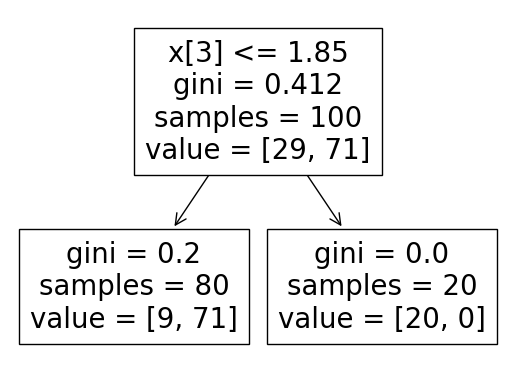

In [256]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [257]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1


In [258]:
example.tail()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2
145,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0054,-1
146,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0054,-1
147,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0054,-1
148,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0054,-1
149,5.9,3.0,5.1,1.8,-1,0.01,-1,0.0,0.0054,1


In [259]:
#adding a field misclassified2
example.loc[example.Label != example.pred2, 'misclassified2'] = 1
example.loc[example.Label == example.pred2, 'misclassified2'] = 0

In [260]:
print('Total misclassified - TRUE', example.loc[example.misclassified2 == 1].shape[0])
print('Total misclassified - FALSE', example.loc[example.misclassified2 == 0].shape[0])

Total misclassified - TRUE 16
Total misclassified - FALSE 84


In [261]:
# calculation of error
e2 = sum(example['misclassified2'] * example['prob2'])
e2

0.15239999999999995

In [262]:
#calculation of alpha
alpha2 = 0.5*log((1-e2)/e2)
alpha2

0.8579500915707993

In [263]:
#update weight
new_weight = example['prob2']*np.exp(-1*alpha2*example['Label']*example['pred2'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

normalized_weight.head()

50    0.003182
51    0.003182
52    0.042069
53    0.003182
54    0.003182
dtype: float64

In [264]:
example['prob3'] = round(normalized_weight,4)

In [265]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0032
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0421
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032


In [266]:
#round 3
random.seed(30)
example3 = example.sample(len(example), replace = True, weights = example['prob3'])
example3 = example3.iloc[:,0:5]
X_train = example3.iloc[0:len(iris),0:4]
y_train = example3.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred3 after the third round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred3'] = y_pred

[Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.484\nsamples = 100\nvalue = [59, 41]'),
 Text(0.25, 0.25, 'gini = 0.245\nsamples = 42\nvalue = [6, 36]'),
 Text(0.75, 0.25, 'gini = 0.158\nsamples = 58\nvalue = [53, 5]')]

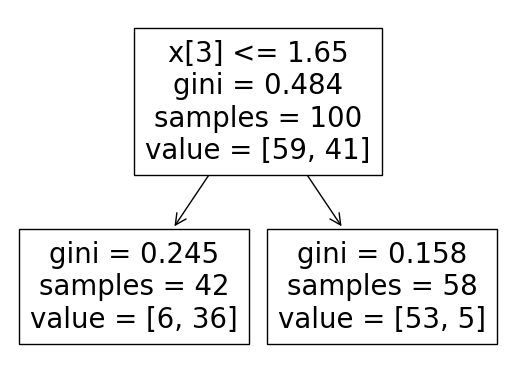

In [267]:
#plotting tree for round 3 boosting
tree.plot_tree(clf)

In [268]:
#adding a field misclassified3
example.loc[example.Label != example.pred3, 'misclassified3'] = 1
example.loc[example.Label == example.pred3, 'misclassified3'] = 0

In [269]:
#weighted error calculation
e3 = sum(example['misclassified3'] * example['prob3']) #/len(example)
e3

0.15499999999999997

In [270]:
#calculation of performance(alpha)
alpha3 = 0.5*log((1-e3)/e3)
alpha3

0.8479557552189636

In [271]:
#update weight
new_weight = example['prob3']*np.exp(-1*alpha3*example['Label']*example['pred3'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

normalized_weight.head()

50    0.001892
51    0.001892
52    0.024886
53    0.001892
54    0.001892
dtype: float64

In [272]:
example['prob4'] = round(normalized_weight,4)

In [273]:
example.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0019
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0019
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0421,1,0.0,0.0249
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0019
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0019


In [274]:
#Round 4
random.seed(40)
example4 = example.sample(len(example), replace = True, weights = example['prob4'])
example4 = example4.iloc[:,0:5]
X_train = example4.iloc[0:len(iris),0:4]
y_train = example4.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred4 after the fourth round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred4'] = y_pred

[Text(0.5, 0.75, 'x[2] <= 5.05\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 72\nvalue = [24, 48]'),
 Text(0.75, 0.25, 'gini = 0.069\nsamples = 28\nvalue = [27, 1]')]

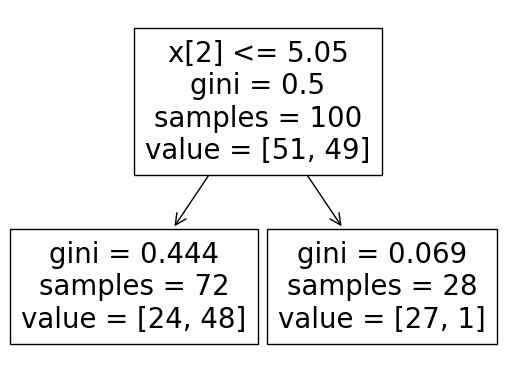

In [275]:
#plotting tree for round 4 boosting
tree.plot_tree(clf)

In [276]:
#adding a field misclassified4
example.loc[example.Label != example.pred4, 'misclassified4'] = 1
example.loc[example.Label == example.pred4, 'misclassified4'] = 0

In [277]:
#error calculation
e4 = sum(example['misclassified4'] * example['prob4']) 
e4

0.2679000000000001

In [278]:
# calculation of performance (alpha)
alpha4 = 0.5*log((1-e4)/e4)

In [279]:
#printing the alpha value which is used in each round of boosting
print(alpha1)
print(alpha2)
print(alpha3)
print(alpha4)

1.2933446720489712
0.8579500915707993
0.8479557552189636
0.5026516700510169


In [280]:
#final prediction
t = alpha1 * example['pred1'] + alpha2 * example['pred2'] + alpha3 * example['pred3'] + alpha4 * example['pred4']

In [281]:
#sign of the final prediction
np.sign(list(t))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [282]:
example['final_pred'] = np.sign(list(t))

In [283]:
example

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4,pred4,misclassified4,final_pred
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0019,1,0.0,1.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0019,1,0.0,1.0
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0421,1,0.0,0.0249,1,0.0,1.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0019,1,0.0,1.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0032,1,0.0,0.0019,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1,0.01,-1,0.0,0.0054,-1,0.0,0.0032,-1,0.0,0.0019,-1,0.0,-1.0
146,6.3,2.5,5.0,1.9,-1,0.01,-1,0.0,0.0054,-1,0.0,0.0032,-1,0.0,0.0019,1,1.0,-1.0
147,6.5,3.0,5.2,2.0,-1,0.01,-1,0.0,0.0054,-1,0.0,0.0032,-1,0.0,0.0019,-1,0.0,-1.0
148,6.2,3.4,5.4,2.3,-1,0.01,-1,0.0,0.0054,-1,0.0,0.0032,-1,0.0,0.0019,-1,0.0,-1.0


In [284]:
from sklearn.metrics import confusion_matrix

#Confusion matrix
c=confusion_matrix(example['Label'], example['final_pred'])
c

array([[48,  2],
       [ 3, 47]], dtype=int64)

In [285]:
#Overall Accuracy
(c[0,0]+c[1,1])/np.sum(c)*100

95.0

## Using scikit-learn

In [286]:
from sklearn.ensemble import AdaBoostClassifier

iris = pd.read_csv("iris.csv")  
iris = iris[(iris['species'] == 'versicolor') | (iris['species'] == 'virginica')]

#X_train and Y_train split
X_train = iris.iloc[0:len(iris),0:4]
y_train = iris.iloc[0:len(iris),4]

clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X_train.values, y_train)

clf.predict([[5.5, 2.5, 4.0, 1.3]])

clf.score(X_train.values, y_train)

0.96